In [1]:
#Importando as bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
#Upload do arquivo
from google.colab import files
arq= files.upload()

Saving AdventureWorks.xlsx to AdventureWorks.xlsx


In [3]:
#Criando nosso dataframe e visualizando suas cinco primeiras linhas
df= pd.read_excel("AdventureWorks.xlsx")
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red


In [6]:
#Quantidade de linhas e colunas
df.shape

(904, 16)

In [7]:
#Verificando os tipos de dados 
df.dtypes

Data Venda        datetime64[ns]
Data Envio        datetime64[ns]
ID Loja                    int64
ID Produto                 int64
ID Cliente                 int64
No. Venda                 object
Custo Unitário           float64
Preço Unitário           float64
Quantidade                 int64
Valor Desconto           float64
Valor Venda              float64
Produto                   object
Fabricante                object
Marca                     object
Classe                    object
Cor                       object
dtype: object

In [17]:
#Qual a receita total?
df["Valor Venda"].sum()

5984606.1426

In [23]:
round(df["Valor Venda"].sum(), 2)

5984606.14

In [24]:
#Qual o custo total?
df["Custo"] = df["Custo Unitário"].mul(df["Quantidade"])

In [26]:
#Arredondando a soma do custo total em duas casas decimais
round(df["Custo"].sum(), 2)

2486783.05

In [28]:
#Agora que temos receita e custo total podemos criar uma coluna lucro que é
df["Lucro"] = df["Valor Venda"] - df["Custo"]

In [29]:
#Total lucro
round(df["Lucro"].sum(), 2)

3497823.09

In [32]:
df.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
1,2008-05-12,2008-05-17,306,384,19051,200805123CS567,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
2,2008-05-14,2008-05-20,306,384,19052,200805143CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
3,2008-05-21,2008-05-27,306,384,19052,200805213CS576,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52
4,2008-06-20,2008-06-27,306,384,19053,200806203CS586,348.58,758.0,6,0.0,4548.0,Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,2091.48,2456.52


In [35]:
#Criando uma coluna com total de dias para enviar o produto
df["Tempo de Envio"] = df["Data Envio"] - df["Data Venda"]
df["Tempo de Envio"].head()

0   20 days
1    5 days
2    6 days
3    6 days
4    7 days
Name: Tempo de Envio, dtype: timedelta64[ns]

In [41]:
#Extraindo apenas os dias
df["Tempo de Envio"] = (df["Data Envio"] - df["Data Venda"]).dt.days

In [42]:
#Verificando o tipo da coluna
df["Tempo de Envio"].dtype

dtype('int64')

In [43]:
#Média do tempo de envio por marca
df.groupby("Marca")["Tempo de Envio"].mean()

Marca
Adventure Works    8.663866
Contoso            8.470930
Fabrikam           8.510121
Name: Tempo de Envio, dtype: float64

In [44]:
#Saber o lucro por ano e por marca
df.groupby([df["Data Venda"].dt.year,"Marca"])["Lucro"].sum()
pd.options.display.float_format = '{:20,.2f}'.format

In [45]:
#Verificando se temos dados faltantes 
df.isnull().sum()

Data Venda        0
Data Envio        0
ID Loja           0
ID Produto        0
ID Cliente        0
No. Venda         0
Custo Unitário    0
Preço Unitário    0
Quantidade        0
Valor Desconto    0
Valor Venda       0
Produto           0
Fabricante        0
Marca             0
Classe            0
Cor               0
Custo             0
Lucro             0
Tempo de Envio    0
dtype: int64

In [46]:
#Resetando o index
lucro_ano = df.groupby([df["Data Venda"].dt.year, "Marca"])["Lucro"].sum().reset_index()
lucro_ano

,Data Venda,Marca,Lucro
0,2008,Adventure Works,"306,641.16"
1,2008,Contoso,"56,416.00"
2,2008,Fabrikam,"1,557,020.55"
3,2009,Adventure Works,"405,395.08"
4,2009,Contoso,"138,258.95"
5,2009,Fabrikam,"1,034,091.35"


In [47]:
#Qual o total de produtos vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = False)

Produto
Headphone Adapter for Contoso Phone E130 Silver    25232
Headphone Adapter for Contoso Phone E130 White     25008
Adventure Works Laptop15.4W M1548 Black             1089
Fabrikam Trendsetter 2/3'' 17mm X100 Grey           1087
Adventure Works Laptop15.4W M1548 Red               1047
Fabrikam Trendsetter 2/3'' 17mm X100 Black           926
Fabrikam Trendsetter 1/3'' 8.5mm X200 Black          884
Fabrikam Trendsetter 1/3'' 8.5mm X200 Grey           845
Fabrikam Trendsetter 1/3'' 8.5mm X200 White          789
Name: Quantidade, dtype: int64

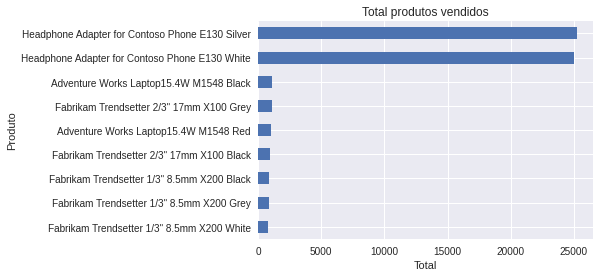

In [48]:
#Gráfico Total de Produtos Vendidos
df.groupby("Produto")["Quantidade"].sum().sort_values(ascending = True).plot.barh(title = "Total produtos vendidos")
plt.xlabel("Total")
plt.ylabel("Produto");

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

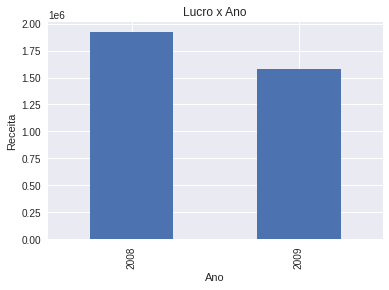

In [49]:
#Lucro/Ano
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum().plot.bar(title = "Lucro x Ano")
plt.xlabel("Ano")
plt.ylabel("Receita");
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

In [50]:
df.groupby(df["Data Venda"].dt.year)["Lucro"].sum()

Data Venda
2008           1,920,077.71
2009           1,577,745.38
Name: Lucro, dtype: float64

In [63]:
#Selecionando apenas as vendas de 2009
df_2009=df[df["Data Venda"].dt.year == 2009]
df_2009.head()

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de Envio
11,2009-05-02,2009-05-14,199,384,18938,200905023CS847,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
12,2009-05-16,2009-05-27,306,384,19067,200905163CS746,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",11
13,2009-05-31,2009-06-12,306,384,19068,200905313CS748,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",12
14,2009-06-28,2009-07-11,199,384,18959,200906283CS870,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",13
15,2009-07-08,2009-07-12,306,384,19070,200907083CS757,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",4


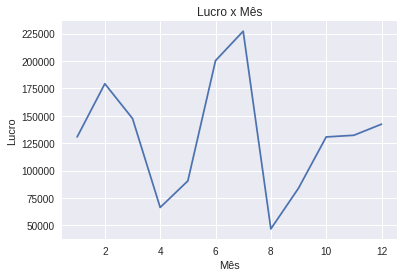

In [68]:
df_2009.groupby(df_2009["Data Venda"].dt.month)["Lucro"].sum().plot(title="Lucro x Mês")
plt.xlabel("Mês")
plt.ylabel("Lucro");

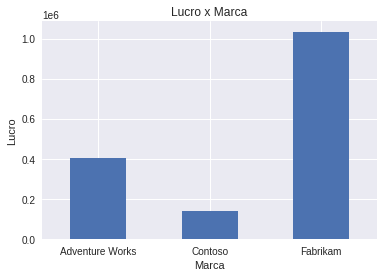

In [69]:
df_2009.groupby("Marca")["Lucro"].sum().plot.bar(title = "Lucro x Marca")
plt.xlabel("Marca")
plt.ylabel("Lucro")
plt.xticks(rotation = 'horizontal');

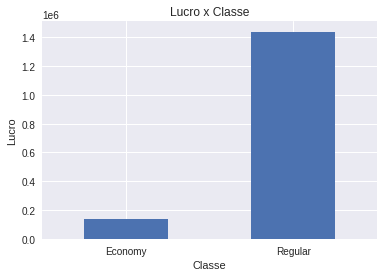

In [70]:
df_2009.groupby("Classe")["Lucro"].sum().plot.bar(title = "Lucro x Classe")
plt.xlabel("Classe")
plt.ylabel("Lucro")
plt.xticks(rotation = 'horizontal');

{'boxes': [<matplotlib.lines.Line2D at 0x7f0105e539d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f0105e55a50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f0105e5da90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f0105e5d550>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f0105e53f90>,
  <matplotlib.lines.Line2D at 0x7f0105e55510>]}

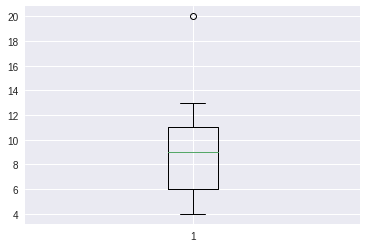

In [75]:
#Gráfico de boxplot
plt.boxplot(df["Tempo de Envio"]) #O sinal ; tira a caixa de texto

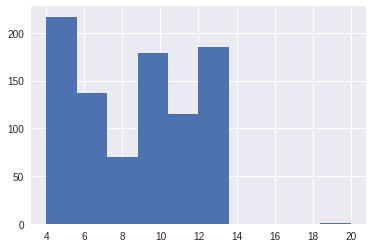

In [76]:
#Gráfico Histograma
plt.hist(df["Tempo de Envio"]);

In [77]:
#Tempo mínimo de envio
df["Tempo de Envio"].min()

4

In [78]:
#Tempo máximo de envio
df["Tempo de Envio"].max()

20

In [79]:
#Identificando o outlier
df[df["Tempo de Envio"] == 20]

,Data Venda,Data Envio,ID Loja,ID Produto,ID Cliente,No. Venda,Custo Unitário,Preço Unitário,Quantidade,Valor Desconto,Valor Venda,Produto,Fabricante,Marca,Classe,Cor,Custo,Lucro,Tempo de Envio
0,2008-05-09,2008-05-29,199,384,18839,200805093CS607,348.58,758.00,6,0.00,"4,548.00",Adventure Works Laptop15.4W M1548 Red,Adventure Works,Adventure Works,Regular,Red,"2,091.48","2,456.52",20


In [81]:
#Salvar em CSV
df.to_csv("df_vendas_novo.csv", index = False)